## Different Evaluation Techniques and Metrics are :
### Techniques : i) K-fold cross validation   ii) Holdout
### Metrics:
### Classification metrics : AUC, Classification accuracy , TPR/FPR , confusion_metrix , Logarthmic loss , F-measure (f1-score harmonic mean )
### Regression metrics : RMSE , MAE

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics

In [2]:
df = pd.read_excel(r'C:/BEPEC Python Material/Machine Learning/Logistic Regression/credit_card.xlsx')
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
column_names = df.loc[0,:]
column_names = column_names.to_list()
l1 = df.columns
l1 = l1.to_list()
df.columns = column_names
df.rename(columns= {'PAY_0':'PAY_1'}, inplace=True)
df.drop([0], inplace=True)
column_names = df.columns
for column in column_names:
    df[column] = pd.to_numeric(df[column]) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
df['MARRIAGE'] = df['MARRIAGE'].replace(0,3, regex=True)

In [5]:
df.drop(columns='ID', inplace=True)

In [6]:
df.shape

(30000, 24)

In [11]:
# We can't drop all these 1930 rows.
df.loc[(df['BILL_AMT1'] < 0) | (df['BILL_AMT2'] < 0) | (df['BILL_AMT3'] < 0) | (df['BILL_AMT4'] < 0) | (df['BILL_AMT5'] < 0) | (df['BILL_AMT6'] < 0)]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
8,100000,2,2,2,23,0,0,0,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
27,60000,1,1,2,27,1,0,0,0,0,...,-57,127,-189,0,1000,0,500,0,1000,1
36,160000,1,1,2,30,0,0,0,0,0,...,-923,-1488,-1884,131,396,396,565,792,0,0
38,60000,2,2,2,22,0,0,0,0,0,...,6026,-28335,18660,1500,1518,2043,0,47671,617,0
57,180000,2,3,1,34,0,0,0,0,0,...,7142,-679,8321,8500,1500,7500,679,9000,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29932,60000,1,2,3,41,0,0,0,0,0,...,26940,9971,-11798,2200,2000,1200,0,0,28000,0
29959,230000,1,3,2,31,0,0,0,0,0,...,417,613,-191,1000,1000,1000,1000,0,0,0
29963,50000,1,2,2,30,1,0,2,0,0,...,7300,0,0,528,0,7300,0,0,0,0
29990,150000,1,1,2,35,0,0,0,0,0,...,780,0,0,9054,0,783,0,0,0,0


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [13]:
X = df.iloc[:,:-1]
print(X.shape)

(30000, 23)


In [15]:
y = df.iloc[:,-1]
print(y.shape)

(30000,)


In [16]:
y

1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default payment next month, Length: 30000, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 0)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24000, 23)
(24000,)
(6000, 23)
(6000,)


In [21]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
model = LogisticRegression()
#model = neighbors.KNeighborsClassifier()
#model = DecisionTreeClassifier(criterion='entropy',max_depth= 8)
#model = SVC(kernel='linear',  gamma = 10, C= 1)


model.fit(X_train,y_train)

LogisticRegression()

In [22]:
#Testing prediction
test_predicted = model.predict(X_test)
#print(predicted)
print(len(test_predicted))
#Training prediction
train_predicted = model.predict(X_train)
print(len(train_predicted))

6000
24000


In [24]:
y_test.value_counts()

0    4703
1    1297
Name: default payment next month, dtype: int64

In [27]:
y_train.value_counts()

0    18661
1     5339
Name: default payment next month, dtype: int64

In [36]:
#Confusion Matrix
label = ['Non-def','Def']
print("-------test matrix---------",)
cm = metrics.confusion_matrix(y_test, test_predicted)
print(cm)
print("-------train matrix---------",)
print(metrics.confusion_matrix(y_train, train_predicted))


-------test matrix---------
[[4702    1]
 [1297    0]]
-------train matrix---------
[[18659     2]
 [ 5338     1]]


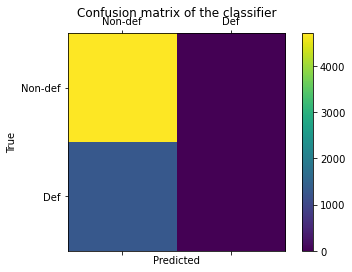

In [53]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + label)
ax.set_yticklabels([''] + label)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [28]:
#Classification Report
print(metrics.classification_report(y_test, test_predicted))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4703
           1       0.00      0.00      0.00      1297

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



In [55]:
result = model.score(X_test, y_test)
print(result*100)

78.36666666666666


In [39]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,test_predicted)

0.7836666666666666

In [54]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = model, X = X_train,\
     y = y_train, cv = 10)
print("Accuracy Mean {} Accuracy Variance \
     {}".format(accuracies.mean(),accuracies.std()))
print(accuracies)

Accuracy Mean 0.7773749999999999 Accuracy Variance      0.0003254270698294507
[0.77791667 0.7775     0.7775     0.77708333 0.7775     0.7775
 0.77708333 0.7775     0.77666667 0.7775    ]


AUC - Test Set: 49.99%


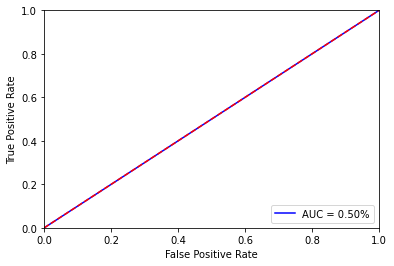

In [45]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, test_predicted)
roc_auc = metrics.auc(fpr,tpr)
print('AUC - Test Set: %.2f%%' % (roc_auc*100))

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'b',label = 'AUC = %0.2f%%' %roc_auc )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
## From this we can conclude that model has 0/very very less seprability value

In [43]:
# propability of all outcomes
probs

array([[0.52494975, 0.47505025],
       [0.54242173, 0.45757827],
       [0.78955346, 0.21044654],
       ...,
       [0.68474617, 0.31525383],
       [0.52594845, 0.47405155],
       [0.74651219, 0.25348781]])

In [48]:
print(preds) # Propabilies of positive outcome only
metrics.roc_curve(y_test, test_predicted)

[0.47505025 0.45757827 0.21044654 ... 0.31525383 0.47405155 0.25348781]


(array([0.00000000e+00, 2.12630236e-04, 1.00000000e+00]),
 array([0., 0., 1.]),
 array([2, 1, 0], dtype=int64))

In [46]:
print(tpr) # 0/1297
print(threshold)

[0. 0. 1.]
[2 1 0]


In [49]:
print(fpr) # 1/4703

[0.00000000e+00 2.12630236e-04 1.00000000e+00]
